In [1]:
import numpy as np
import scipy.linalg as la
import itertools as it
import time
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math #ToDo: allowed for exp??


In [2]:
def noisysincfunction(N, noise):
    X = np.sort(2 * np.pi * np.random.rand(1, N) ) - np.pi
    Y = np.sinc(X) + noise * np.random.randn(1, N)
    return X.reshape(-1, 1), Y.flatten()

In [3]:
Xtr, Ytr = noisysincfunction(100, 0.1)
Xte = np.arange( -np.pi, np.pi, 0.01 ).reshape(-1, 1)

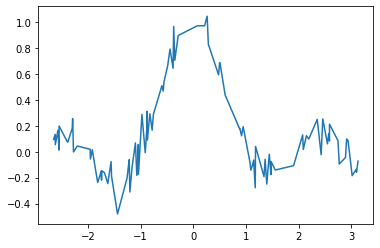

In [4]:
plt.plot(Xtr, Ytr)

In [5]:
def cv(X, y, method, params, loss_function=zero_one_loss, nfolds=10, nrepetitions=5):
    ''' your header here!
    '''
    return method

NameError: name 'zero_one_loss' is not defined

In [120]:
b = np.array([[1],[2],[3]])
c = np.array([4,5,6])
(b*b.T+1)**2

array([[  4,   9,  16],
       [  9,  25,  49],
       [ 16,  49, 100]])

In [121]:
(b.T*b+1)**2

array([[  4,   9,  16],
       [  9,  25,  49],
       [ 16,  49, 100]])

In [349]:
class krr():
    ''' your header here!
    '''
    def __init__(self, kernel='linear', kernelparameter=1, regularization=1):
        self.kernel = kernel
        self.kernelparameter = kernelparameter
        self.regularization = regularization

    def getTrainK(self, X, kernel, kernelparam=1.):
        if kernel == 'linear':
            return X.T*X
        if kernel == 'polynomial':
            return (X.T*X+1)**kernelparam
        if kernel == 'gaussian':
            return (np.exp(-1*((X.T-X)**2)/2*kernelparam**2))
            pass
        print("dafuq")
        pass
    
    def getPredK(self, X, kernel, kernelparam=1.):
        if kernel == 'linear':
            return self.trainX.T*X
        if kernel == 'polynomial':
            return (self.trainX.T*X+1)**kernelparam
        if kernel == 'gaussian':
            return (np.exp(-1*((self.trainX.T-X)**2)/2*kernelparam**2))
            pass
        print("dafuq")
        pass

    def fit(self, X, y, kernel=False, kernelparameter=False, regularization=False):
        ''' your header here!
        '''
        if kernel is not False:
            self.kernel = kernel
        if kernelparameter is not False:
            self.kernelparameter = kernelparameter
        if regularization is not False:
            self.regularization = regularization
        self.trainX = X
        self.alpha = np.linalg.inv(self.getTrainK(X, self.kernel, self.kernelparameter)+self.regularization*np.eye(len(X)))@y
        return self

    def predict(self, X):
        self.m = np.sum(self.alpha*self.getPredK(X, self.kernel, self.kernelparameter),axis=1)
        return self.m

In [350]:
test = krr(kernel = 'gaussian', kernelparameter=3) #8 for polynomial

In [351]:
a = test.fit(X=Xtr, y=Ytr)

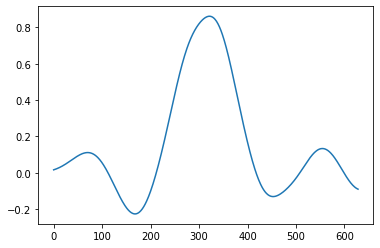

In [352]:
plt.plot(a.predict(Xte))

In [311]:
a.alpha

array([ 3.54360023e-03,  3.86337938e-02, -4.13816774e-02,  6.30704148e-02,
       -9.24554504e-02,  9.39072556e-02, -3.07169052e-02, -3.49355809e-02,
        8.19271278e-02,  1.58844656e-01, -9.55469848e-02, -3.03864200e-02,
        5.30190544e-02, -1.98334807e-02,  7.13218952e-02, -1.25450990e-01,
        1.27675482e-03, -6.90112157e-02,  4.38386980e-03,  1.35024287e-02,
       -4.71783205e-02,  1.40221266e-01,  2.80182222e-02, -2.54157865e-01,
       -2.98929815e-02,  9.01138922e-02,  4.32326808e-02, -1.66956284e-01,
       -2.89049737e-03,  1.34608127e-01, -1.39958109e-01, -4.41343882e-02,
        7.39072725e-02, -1.58257680e-01,  2.39013252e-01, -1.23103582e-01,
        2.93861739e-02,  1.58516657e-01, -1.88856723e-02, -7.05116384e-02,
        7.73271314e-02, -1.00398005e-01, -6.09125217e-03,  2.35018384e-02,
       -4.60262503e-02,  9.19222145e-03,  6.07245930e-02,  1.50228159e-01,
       -4.60919583e-02,  2.68305672e-01, -8.07398797e-03,  1.42297638e-01,
        1.11086900e-01,  

array([[153.23839292, 174.69682028, 111.230549  , ...,  -0.27256114,
         12.7463705 , -51.94373928],
       [151.93572392, 173.21346997, 110.28619141, ...,  -0.26966998,
         12.61120171, -51.39347337],
       [150.64045852, 171.73854026, 109.34719413, ...,  -0.26679934,
         12.47699192, -50.8471074 ],
       ...,
       [-72.41550965, -81.89502235, -52.10479868, ...,   0.49648735,
        -23.18375786,  93.94251094],
       [-73.21098785, -82.79599417, -52.67811125, ...,   0.5008275 ,
        -23.38646901,  94.76461679],
       [-74.01227033, -83.70354993, -53.25561393, ...,   0.50519287,
        -23.59035835,  95.59150496]])

In [96]:
a.predict(Xte)

(100,)
(629, 629)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 629 is different from 100)

In [149]:
np.sum(getK(X=np.array([[-1.5]]), kernel='polynomial', kernelparam=3.)*w)

9.468079765807724

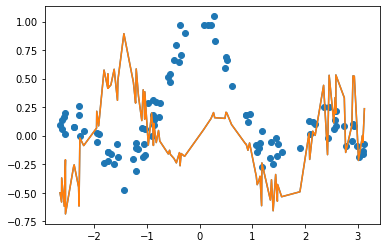

In [144]:
plt.scatter(Xtr, Ytr)
plt.plot(Xtr, (w*Xtr.flatten()))
plt.plot(Xtr, (act_w*Xtr.flatten()))

In [29]:
a.predict(Xte)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 629 is different from 100)

In [268]:
import sklearn
from sklearn.kernel_ridge import KernelRidge
import numpy as np
clf = KernelRidge(kernel='gaussian', alpha=1.0, degree=5)

In [269]:
clf.fit(Xtr, Ytr)

KernelRidge(alpha=1.0, degree=5, kernel='polynomial')

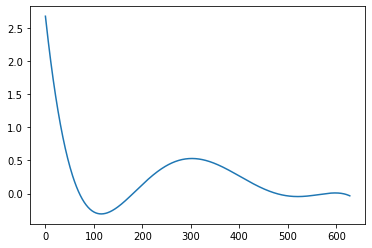

In [270]:
plt.plot(clf.predict(Xte))

In [217]:
act_w = clf.dual_coef_

In [225]:
act_pred = clf.predict(Xte)

In [317]:
sklearn.metrics.pairwise.PAIRWISE_KERNEL_FUNCTIONS

{'additive_chi2': <function sklearn.metrics.pairwise.additive_chi2_kernel(X, Y=None)>,
 'chi2': <function sklearn.metrics.pairwise.chi2_kernel(X, Y=None, gamma=1.0)>,
 'linear': <function sklearn.metrics.pairwise.linear_kernel(X, Y=None, dense_output=True)>,
 'polynomial': <function sklearn.metrics.pairwise.polynomial_kernel(X, Y=None, degree=3, gamma=None, coef0=1)>,
 'poly': <function sklearn.metrics.pairwise.polynomial_kernel(X, Y=None, degree=3, gamma=None, coef0=1)>,
 'rbf': <function sklearn.metrics.pairwise.rbf_kernel(X, Y=None, gamma=None)>,
 'laplacian': <function sklearn.metrics.pairwise.laplacian_kernel(X, Y=None, gamma=None)>,
 'sigmoid': <function sklearn.metrics.pairwise.sigmoid_kernel(X, Y=None, gamma=None, coef0=1)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_similarity(X, Y=None, dense_output=True)>}

In [202]:
import os